In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import h5py
from glob import glob
import json
import sys

In [2]:
index = 9
numeral = 'x'

In [3]:
user_data = str('./data/data')
train_data = user_data + '/train/'
val_data = user_data + '/val/'

test_data = str('./label_book/label_book')
tf.random.set_seed(123)

In [4]:
def get_numpy_images(data_dir, shuffle=True, image_size=(32, 32), 
                     class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"]):
    files = glob(data_dir + '/*/*.png')
    n_files = len(files)
    train = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        labels="inferred",
        label_mode="categorical",
        class_names=class_names,
        shuffle=shuffle,
        seed=123,
        batch_size=n_files,
        image_size=image_size,
    )

    for images, labels in train.take(1):
        images = images.numpy().astype(np.uint8)
        labels = labels.numpy().astype(np.uint8)
        images = images[:, :, :, 0]
        break
        
    return images, labels

In [5]:
train_images, train_labels = get_numpy_images(train_data)
val_images, val_labels = get_numpy_images(val_data)
train_images.shape, val_images.shape

Found 5278 files belonging to 10 classes.
Found 500 files belonging to 10 classes.


((5278, 32, 32), (500, 32, 32))

In [6]:
images = np.concatenate((train_images, val_images), axis=0)
labels = np.concatenate((train_labels, val_labels), axis=0)
images.shape, labels.shape

((5778, 32, 32), (5778, 10))

In [7]:
mask = labels[:, index] == 1
images = images[mask]
labels = labels[mask]
images.shape, labels.shape

((699, 32, 32), (699, 10))

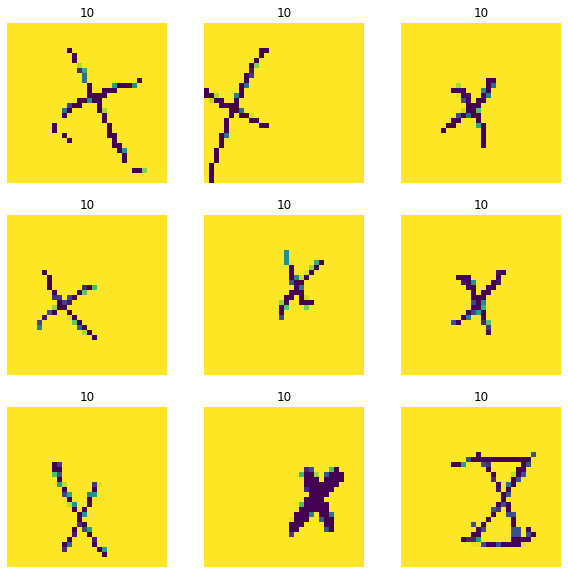

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label = np.where(labels[i, :])[0] + 1
    plt.title(int(label))
    plt.axis("off")

In [12]:
numerals = ["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"]

user_data = str('./data/data')
train_data = user_data + '/train/'
val_data = user_data + '/val/'

train_images, train_labels = get_numpy_images(train_data)
val_images, val_labels = get_numpy_images(val_data)
images = np.concatenate((train_images, val_images), axis=0)
labels = np.concatenate((train_labels, val_labels), axis=0)

for index, num in enumerate(numerals):

    mask = labels[:, index] == 1
    num_images = images[mask]
    num_labels = labels[mask]

    fp_out = 'image_data_{}.h5'.format(num)
    
    print('Writing {} images to {}'.format(len(num_images), fp_out))

    with h5py.File(fp_out, 'w') as f:
        f['images'] = num_images
        f['labels'] = num_labels

Found 5278 files belonging to 10 classes.
Found 500 files belonging to 10 classes.
Writing 960 images to image_data_i.h5
Writing 612 images to image_data_ii.h5
Writing 606 images to image_data_iii.h5
Writing 562 images to image_data_iv.h5
Writing 486 images to image_data_v.h5
Writing 794 images to image_data_vi.h5
Writing 247 images to image_data_vii.h5
Writing 256 images to image_data_viii.h5
Writing 556 images to image_data_ix.h5
Writing 699 images to image_data_x.h5
